<a href="https://colab.research.google.com/github/spranav1998/Nifty_Forecasting_LSTM/blob/main/Nifty_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import callbacks
import seaborn as sns  # Data visualization
from sklearn import metrics  # Model evaluation
from sklearn.preprocessing import MinMaxScaler

In [295]:
nifty_folder = '/content/drive/MyDrive/Colab Notebooks/Colab_Datasets/Nifty/'

In [299]:
Nifty_Main_Data = '/content/drive/MyDrive/Colab Notebooks/Colab_Datasets/Nifty/NIfty Close main.xlsx'

In [297]:
df = pd.read_excel(Nifty_20_21_Data)

In [298]:
df.head()

,Date,Sl. No.,Close
0,2017-01-02,1,8179.50
1,2017-01-03,2,8192.25
2,2017-01-04,3,8190.50
3,2017-01-05,4,8273.80
4,2017-01-06,5,8243.80


In [300]:
dataset = np.array(df['Close'])

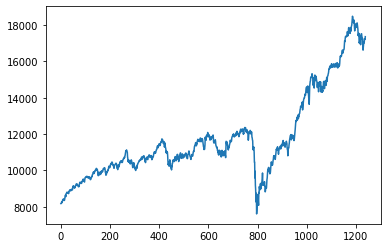

In [301]:
dataset.reshape(1,-1)
plt.plot(dataset)

In [302]:
scaler = MinMaxScaler()
dataset = np.array(df['Close'])
dataset = dataset.reshape(-1,1)
dataset = scaler.fit_transform(dataset)

In [321]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train=dataset[:train_size,:]
test=dataset[train_size:1240,:]
def getdata(data,lookback):
    X,Y=[],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X),np.array(Y).reshape(-1,1)
lookback=1
X_train,y1_train=getdata(train,lookback)
X_test,y1_test=getdata(test,lookback)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [336]:
model=Sequential()
model.add(LSTM(1000,input_shape=(lookback,1),return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer=opt)

In [337]:
stop_early = callbacks.EarlyStopping(
    monitor='loss', patience=5)
checkpoint = callbacks.ModelCheckpoint(
    'Nifty_Best_Model.hdf5',
    verbose=1,
    save_best_only=True,
    monitor='loss')

In [338]:
model.fit(X_train,y1_train, epochs=100,callbacks=[stop_early, checkpoint], batch_size=1)

Epoch 1/100
989/989 [==============================] - ETA: 0s - loss: 0.0022
Epoch 1: loss improved from inf to 0.00219, saving model to Nifty_Best_Model.hdf5
989/989 [==============================] - 36s 30ms/step - loss: 0.0022
Epoch 2/100
989/989 [==============================] - ETA: 0s - loss: 2.3182e-04
Epoch 2: loss improved from 0.00219 to 0.00023, saving model to Nifty_Best_Model.hdf5
989/989 [==============================] - 28s 28ms/step - loss: 2.3182e-04
Epoch 3/100
989/989 [==============================] - ETA: 0s - loss: 2.4013e-04
Epoch 3: loss did not improve from 0.00023
989/989 [==============================] - 28s 28ms/step - loss: 2.4013e-04
Epoch 4/100
989/989 [==============================] - ETA: 0s - loss: 2.4399e-04
Epoch 4: loss did not improve from 0.00023
989/989 [==============================] - 28s 28ms/step - loss: 2.4399e-04
Epoch 5/100
989/989 [==============================] - ETA: 0s - loss: 2.3744e-04
Epoch 5: loss did not improve from 0.000

In [339]:
best_model = models.load_model("/content/Nifty_Best_Model.hdf5")

In [340]:
def revgetdata(data,lookback):
    Y=[]
    for i in range(len(data)-lookback-1):
        Y.append(data[i+lookback,0])
    return np.array(Y).reshape(-1,1)

In [341]:
X_test,y1_test=getdata(test,lookback)
y_pred=best_model.predict(X_test)
y1_test=scaler.inverse_transform(y1_test)

In [342]:
y_pred = revgetdata(y_pred,lookback)
y_pred=scaler.inverse_transform(y_pred)

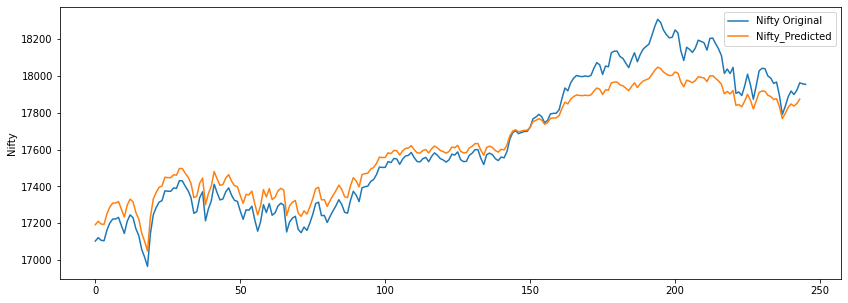

In [343]:
plt.figure(figsize=(14,5))
plt.plot(y1_test, label = 'Nifty Original')
plt.plot(y_pred, label = 'Nifty_Predicted')
plt.ylabel('Nifty')
plt.legend()
plt.show()

# Actual Testing

In [344]:
adf = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Colab_Datasets/Nifty/Nifty Close test 2022.xlsx')

In [345]:
adataset = np.array(adf['Close'])
adataset = adataset.reshape(-1,1)
adataset = scaler.fit_transform(adataset)

In [346]:
aX_test,ay1_test=getdata(adataset,lookback)
aX_test=aX_test.reshape(aX_test.shape[0],aX_test.shape[1],1)

In [347]:
ay_pred=best_model.predict(aX_test)
ay1_test=scaler.inverse_transform(ay1_test)
ay_pred = revgetdata(ay_pred,lookback)
ay_pred=scaler.inverse_transform(ay_pred)

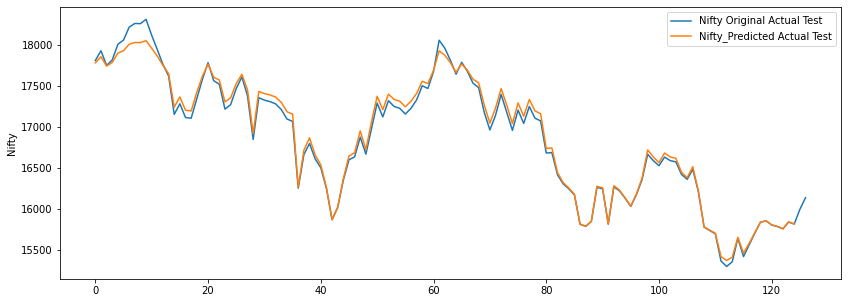

In [348]:
plt.figure(figsize=(14,5))
plt.plot(ay1_test, label = 'Nifty Original Actual Test')
plt.plot(ay_pred, label = 'Nifty_Predicted Actual Test')
plt.ylabel('Nifty')
plt.legend()
plt.show()